<a href="https://colab.research.google.com/github/V-Nayak/EDA_project/blob/main/Capstone_Project_1_Propensity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

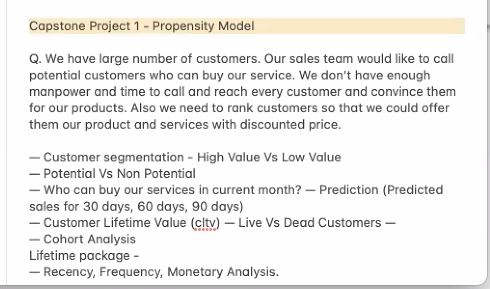

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

## importing libraries

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_excel("/content/drive/MyDrive/EDA/Online Retail.xlsx",engine="openpyxl")
df.head()

## pd.read_excel tries to read the content at given location path after mounting the drive.
## while df.head() tries to give first 5 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [5]:
df.columns
## so in all there r 8 coulmns named following.
## essential are 4--Quantity UnitPrice Custmore ID and country others we can consider Non essentials.

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.info()

## with this we can understand info about the variables, data types etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

## so its basically identifies integer values (not text or other)

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
df.isnull().sum()

## isnull identifies the null entries if any in the columns while sum adds the total entries(of null values) count of the column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total_value         0
dtype: int64

In [9]:
df.shape

## it gives no of rows and columns in the given table.

(541909, 8)

In [10]:
[features for features in df.columns if df[features].isnull().sum()>0]

## in order to get only variable where the null values are loccated.

['Description', 'CustomerID']

In [8]:
## making new data frame with dropped NA values 

new_df = df.dropna(axis = 0, how='any', subset=['InvoiceNo','Quantity','UnitPrice','CustomerID'])
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [29]:
new_df.shape

(406829, 8)

In [8]:
new_df.isnull().sum()

## isnull identifies the null entries if any in the columns while sum adds the total entries(of null values) count of the column

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#### new columns based on existing columns
 
new_df['Total_value'] = new_df.apply(lambda row: row.Quantity * row.UnitPrice, axis = 1) 
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [15]:
new_df.Country.value_counts()

## how many entries are there from different countries

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [16]:
new_df.Country.value_counts().index

## getting the country names

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark',
       'Japan', 'Poland', 'USA', 'Israel', 'Unspecified', 'Singapore',
       'Iceland', 'Canada', 'Greece', 'Malta', 'United Arab Emirates',
       'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil',
       'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')

In [17]:
country_names=new_df.Country.value_counts().index

In [19]:
new_df.Country.value_counts().values

array([361878,   9495,   8491,   7485,   2533,   2371,   2069,   1877,
         1480,   1259,   1086,    803,    758,    695,    622,    462,
          401,    389,    358,    341,    291,    250,    244,    229,
          182,    151,    146,    127,     68,     61,     58,     45,
           35,     32,     30,     17,     10])

In [20]:
country_val=new_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7fb0c276be50>,
 [Text(-1.0343926689532057, 0.3742082393746351, 'United Kingdom'),
  Text(0.8946813452011103, -0.6399572568141811, 'Germany'),
  Text(0.9746642437636971, -0.5099309874174551, 'France'),
  Text(1.0300067101573769, -0.386116791956498, 'EIRE'),
  Text(1.0567665215314244, -0.30535965511241625, 'Spain'),
  Text(1.06756988542357, -0.2651311745847816, 'Netherlands'),
  Text(1.076031047848969, -0.22837947382602086, 'Belgium'),
  Text(1.0824895375091037, -0.1954901562312714, 'Switzerland'),
  Text(1.087193004591745, -0.16736597852244064, 'Portugal'),
  Text(1.0904895153328682, -0.14433508564824513, 'Australia'),
  Text(1.0929242652090847, -0.12456544672252594, 'Norway'),
  Text(1.0946249768326044, -0.10861012887489131, 'Italy'),
  Text(1.0958546343092748, -0.0954076541105902, 'Channel Islands'),
  Text(1.0968561317805507, -0.08310611394721262, 'Finland'),
  Text(1.0976445882665367, -0.07194690993493175, 'Cyprus'),
  Text(1.0982083788607573, -0.062

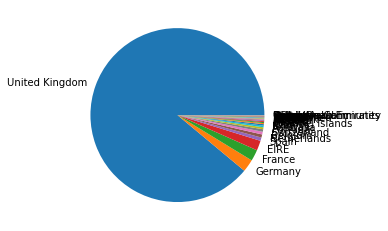

In [21]:
## ploting the pie chart

plt.pie(country_val, labels=country_names)

([<matplotlib.patches.Wedge at 0x7fb0c33cd790>,
 [Text(-1.0721135773923829, 0.24611476422780354, 'United Kingdom'),
  Text(1.0236418757295245, -0.4026876087650832, 'Germany'),
  Text(1.0710668647679815, -0.25063074670935076, 'France'),
  Text(1.0943793917965938, -0.11105740322426827, 'EIRE'),
  Text(1.0997708840454228, -0.02245000235967947, 'Spain')],
 [Text(-0.5847892240322088, 0.13424441685152919, '92.82'),
  Text(0.558350114034286, -0.21964778659913625, '2.44'),
  Text(0.5842182898734444, -0.13670768002328224, '2.18'),
  Text(0.5969342137072329, -0.06057676539505541, '1.92'),
  Text(0.5998750276611396, -0.012245455832552437, '0.65')])

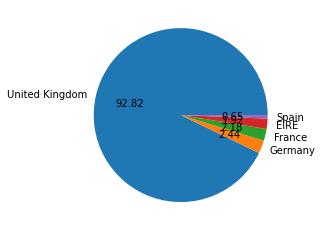

In [23]:
plt.pie(country_val[:5], labels=country_names[:5], autopct='%.2f')

In [ ]:
new_df['TotalPrice'] = new_df['UnitPrice'] * new_df['Quantity'] )

In [10]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["Total_value"] = "sum"


TValue_Table = new_df.groupby("CustomerID").agg(custom_aggregation)

TValue_Table

## This table will create CLV table and will help in identifying high value custmores.

,Country,Total_value
CustomerID,,
12346.0,United Kingdom,0.00
12347.0,Iceland,4310.00
12348.0,Finland,1797.24
12349.0,Italy,1757.55
12350.0,Norway,334.40
...,...,...
18280.0,United Kingdom,180.60
18281.0,United Kingdom,80.82
18282.0,United Kingdom,176.60


In [11]:
custom_aggregation = {}
custom_aggregation["Total_value"] = "sum"


TCountry_Table = TValue_Table.groupby("Country").agg(custom_aggregation)

TCountry_Table.head 

## This table will create CLV table as per countries and will help in identifying area wise value contribution.

<bound method NDFrame.head of                       Total_value
Country                          
Australia              138467.410
Austria                  9439.140
Bahrain                   548.400
Belgium                 41265.880
Brazil                   1143.600
Canada                   3666.380
Channel Islands         20086.290
Cyprus                  13795.100
Czech Republic            707.720
Denmark                 18314.720
EIRE                   250285.220
European Community       1291.750
Finland                 22326.740
France                 196712.840
Germany                221698.210
Greece                   4710.520
Iceland                  4310.000
Israel                   6994.250
Italy                   16890.510
Japan                   35340.620
Lebanon                  1693.880
Lithuania                1661.060
Malta                    2505.470
Netherlands            284661.540
Norway                  35163.460
Poland                   7213.140
Portugal          

In [12]:
# sort Dataframe rows based on "Total Value'   
# column in Descending Order

DescC_Table = TCountry_Table.sort_values(by ='Total_value', ascending = False)
  
# show the resultant Dataframe
DescC_Table.head(12)

,Total_value
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840
Australia,138467.410
Switzerland,55518.390
Spain,53570.320
Belgium,41265.880


In [13]:
# sort Dataframe rows based on "Total Value'   
# column in Descending Order

DescV_Table = TValue_Table.sort_values(by ='Total_value', ascending = False)
  
# show the resultant Dataframe
DescV_Table

,Country,Total_value
CustomerID,,
14646.0,Netherlands,279489.02
18102.0,United Kingdom,256438.49
17450.0,United Kingdom,187482.17
14911.0,EIRE,132572.62
12415.0,Australia,123725.45
...,...,...
12503.0,Spain,-1126.00
17603.0,United Kingdom,-1165.30
14213.0,United Kingdom,-1192.20


In [14]:
# show the resultant Dataframe
DescV_Table.head(30)

,Country,Total_value
CustomerID,,
14646.0,Netherlands,279489.02
18102.0,United Kingdom,256438.49
17450.0,United Kingdom,187482.17
14911.0,EIRE,132572.62
12415.0,Australia,123725.45
14156.0,EIRE,113384.14
17511.0,United Kingdom,88125.38
16684.0,United Kingdom,65892.08
13694.0,United Kingdom,62653.10


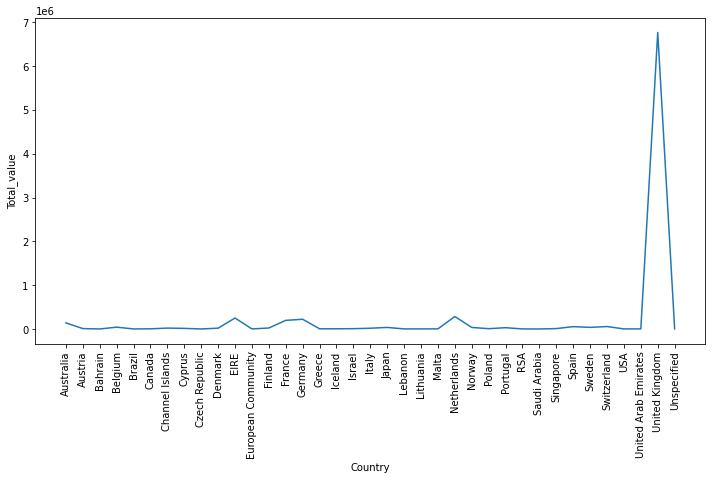

In [28]:
# draw lineplot
plt.xticks(rotation = 90)
sns.lineplot(x="Country", y="Total_value", data=TCountry_Table)

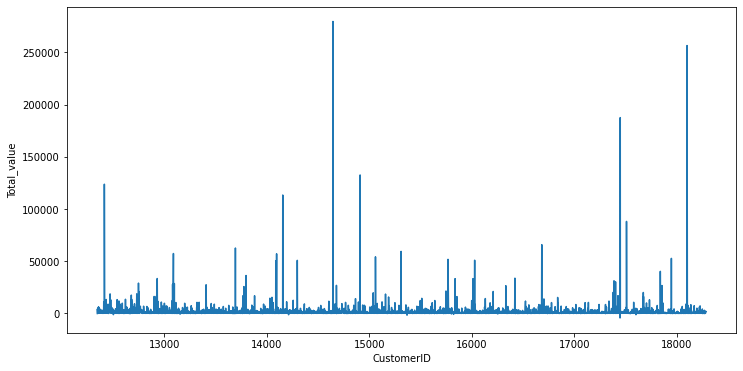

In [26]:
# draw lineplot
sns.lineplot(x="CustomerID", y="Total_value", data=TValue_Table)